## Packages

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.stats import boxcox
from scipy import stats

# Set figure parameters
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (14,8)

In [100]:
import os

# Set working directory
os.chdir("/workspaces/Humanitarian-activity-analysis/")

In [101]:
# Data loading

activity_by_month = pd.read_csv("Data processed/Cleaned_Enriched_activity_data.csv")

activity_by_month.head(2)

,_geojson,project_id,status,organisation,Country,time,sessions,sessions_mapped,sessions_validated,cum_sessions,cum_sessions_mapped,cum_sessions_validated,Year,gpi,gti
0,"{""type"":""Feature"",""properties"":{""project_id"":1...",113,0,OSM RDC,Democratic Republic of the Congo,2012-12-01,18,12,5,18,12,5,2012,2.934,5.825723
1,"{""type"":""Feature"",""properties"":{""project_id"":3...",307,0,Other,Kenya,2013-09-01,56,49,7,56,49,7,2013,2.520,6.974787


In [102]:
activity_by_month = activity_by_month.drop(columns=["_geojson","Year"])

## Descriptive Statistics

In [103]:
activity_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35619 entries, 0 to 35618
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   project_id              35619 non-null  int64  
 1   status                  35619 non-null  int64  
 2   organisation            35619 non-null  object 
 3   Country                 35619 non-null  object 
 4   time                    35619 non-null  object 
 5   sessions                35619 non-null  int64  
 6   sessions_mapped         35619 non-null  int64  
 7   sessions_validated      35619 non-null  int64  
 8   cum_sessions            35619 non-null  int64  
 9   cum_sessions_mapped     35619 non-null  int64  
 10  cum_sessions_validated  35619 non-null  int64  
 11  gpi                     35619 non-null  float64
 12  gti                     35619 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 3.5+ MB


In [104]:
activity_by_month.describe()

,project_id,status,sessions,sessions_mapped,sessions_validated,cum_sessions,cum_sessions_mapped,cum_sessions_validated,gpi,gti
count,35619.000000,35619.000000,35619.000000,35619.000000,35619.000000,35619.000000,35619.000000,35619.000000,35619.000000,35619.000000
mean,6169.933210,0.133131,221.070721,90.751200,49.143912,1496.813274,589.040596,189.079929,2.296755,4.277187
std,2891.205004,0.381896,666.193810,294.868345,212.632464,3326.352758,1033.148884,496.320512,0.454350,2.992055
min,105.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.316000,0.000000
25%,4068.000000,0.000000,4.000000,0.000000,0.000000,162.000000,69.000000,0.000000,1.915000,1.321536
50%,5815.000000,0.000000,19.000000,3.000000,0.000000,598.000000,259.000000,18.000000,2.193000,4.692545
75%,8401.500000,0.000000,144.000000,42.000000,8.000000,1602.000000,691.500000,154.000000,2.691000,6.861342
max,11956.000000,2.000000,18915.000000,8501.000000,11387.000000,100720.000000,20726.000000,16970.000000,3.600000,10.000000


In the above printing we can the global descriptive statistics about activity of organisations by months. Firstly, most of the columns have a very variance as std is very high like number of project created, number of sessions, ...
- `global peace index`:  varied between 0-5
- `global terrorism index`:  varied between 0-10

## Univariate analysis

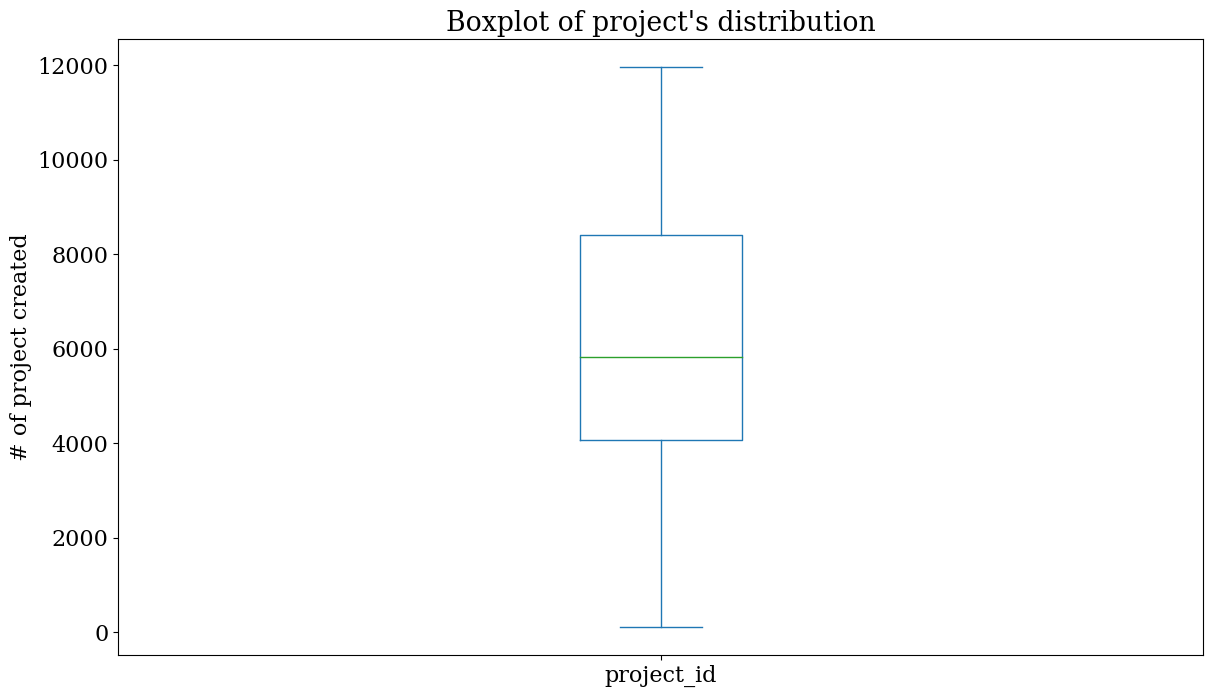

In [105]:
activity_by_month[['project_id']].plot(kind = "box")
plt.title("Boxplot of project's distribution")
plt.ylabel("# of project created")
plt.show()

Number of project created didn't contains some outliers. Most number of project created are between 4063 and 8041 with a std quite high 2891. 

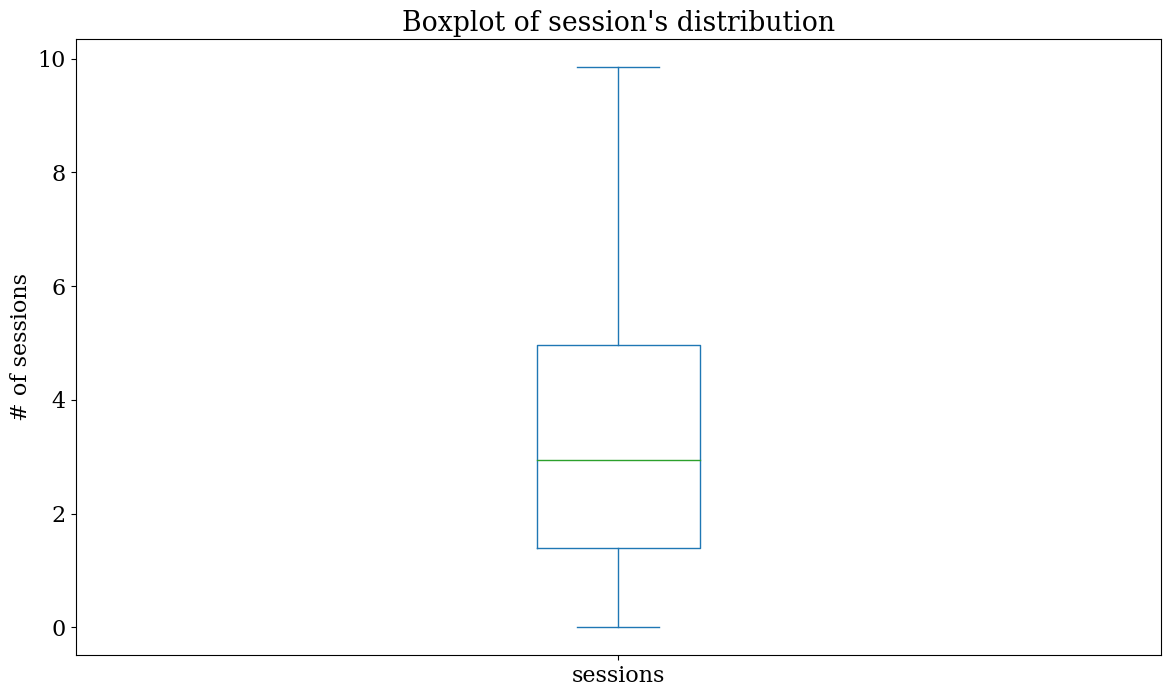

In [106]:
np.log(activity_by_month[['sessions']]).plot(kind = "box")
plt.title("Boxplot of session's distribution")
plt.ylabel("# of sessions")
plt.show()

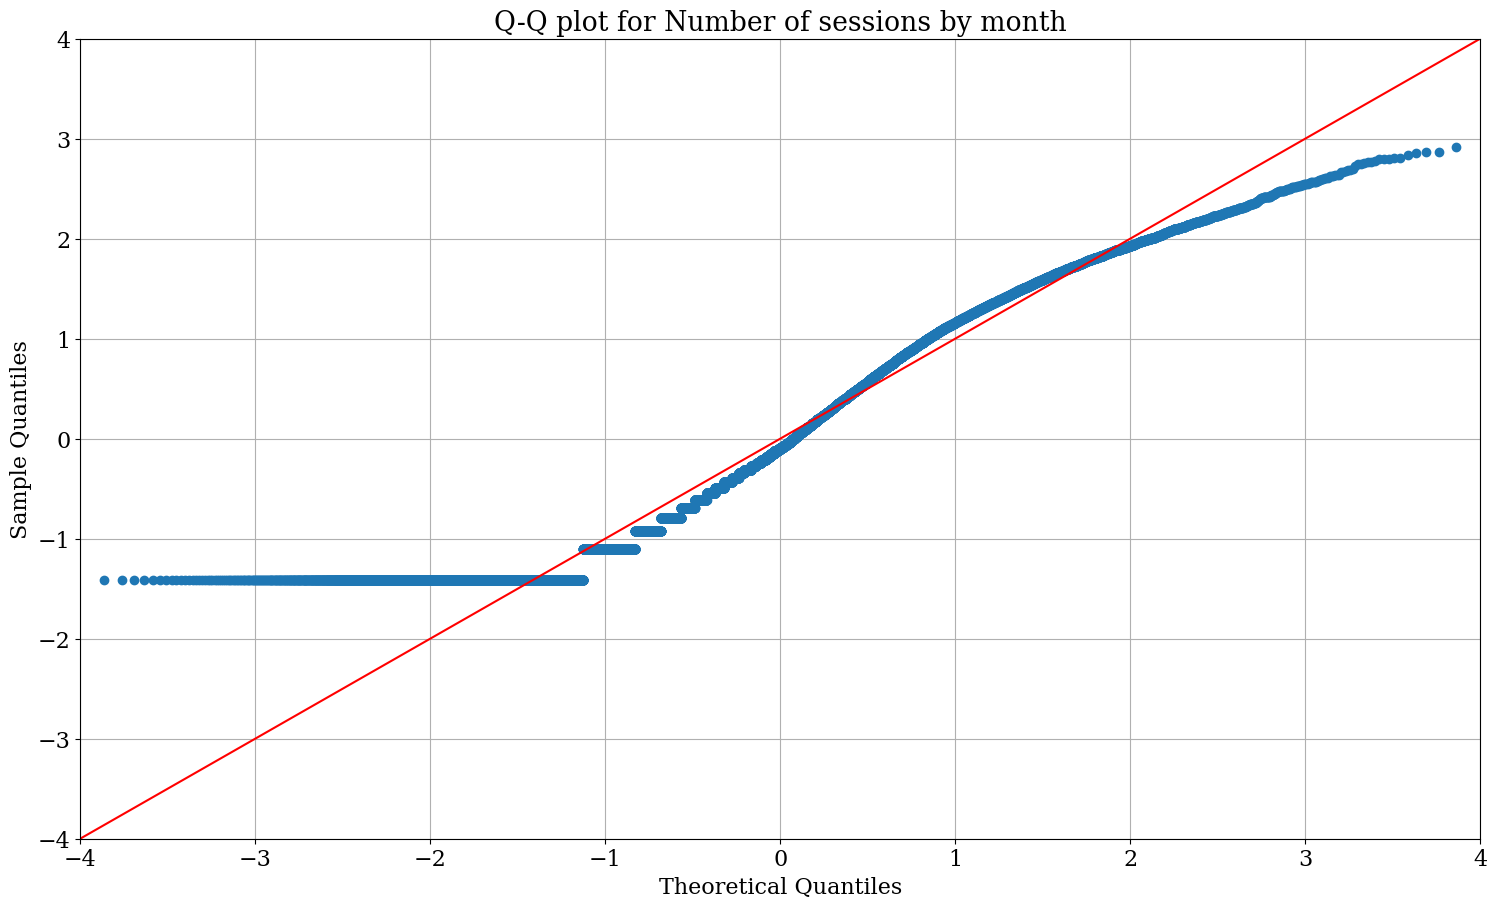

In [107]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(np.log(activity_by_month["sessions"]), stats.norm, fit=True, line='45',ax=axes)
axes.set_ylim([-4,4]); 
axes.set_xlim([-4,4])
axes.set_xticks(axes.get_yticks()); axes.grid()
axes.set_title("Q-Q plot for Number of sessions by month");

We have different feedback from both methodology of outlier checking. For boxlot after log-transform the result is quite good and we haven't any problem of outlier. In constraint of qqplot where we can notice the problem of outlier at the same time the problem normal distribution. 

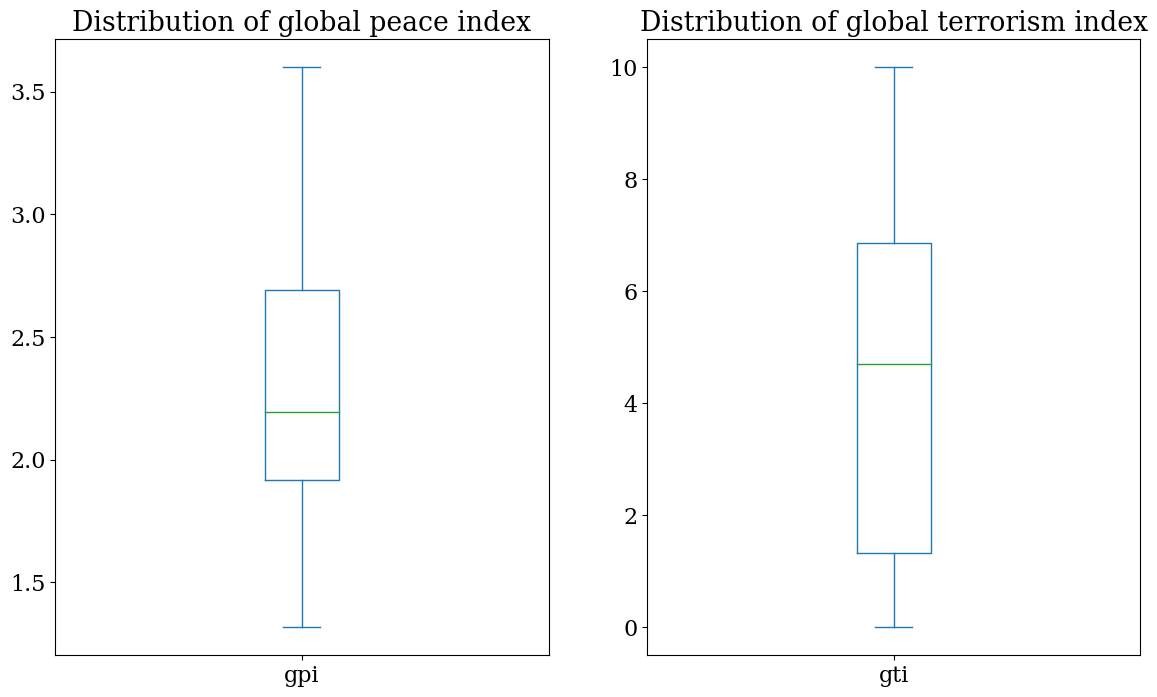

In [108]:
fig,axs = plt.subplots(1,2)

activity_by_month[['gpi']].plot(kind = "box",ax=axs[0])
axs[0].set_title("Distribution of global peace index")

activity_by_month[['gti']].plot(kind = "box",ax=axs[1])
axs[1].set_title("Distribution of global terrorism index")

plt.show()

For the indexes distribution we didn't notice any outliers. As the mean gti indicated that the world face an increasing threat of terrorism impact in worldwide.

## Bivariate analysis

/tmp/ipykernel_3523/2545686630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = activity_by_month.corr()


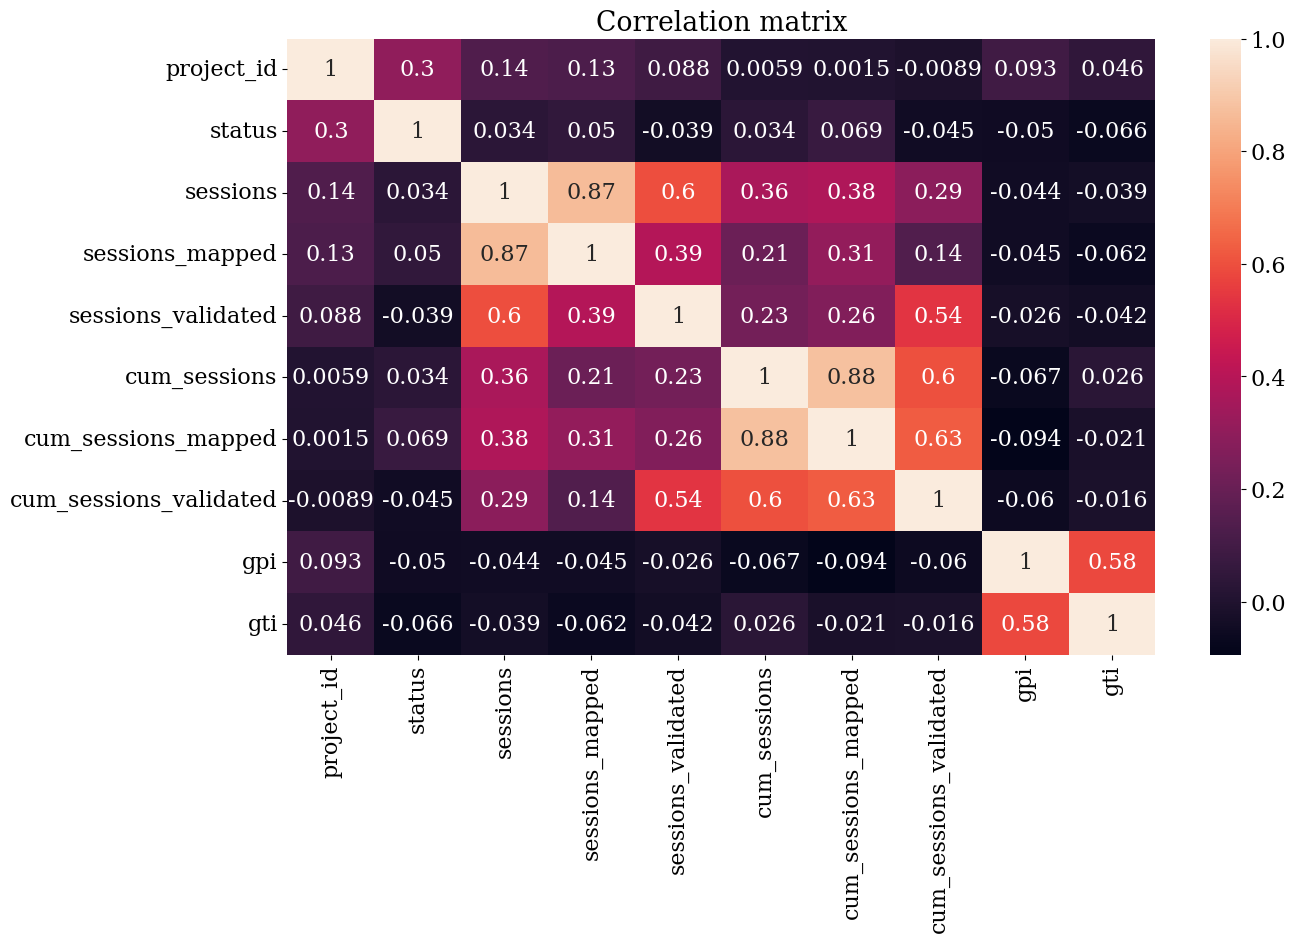

In [109]:
corr = activity_by_month.corr()

sns.heatmap(corr, annot= True)
plt.title("Correlation matrix")
plt.show()

As we are interested about sessions validated. Obviously, we have a strong association between cumulative sessions and sessions mapped. But as gpi and/or pti grow up the sessions validated decrease as well as the sessions mapped. That can be explain when the country live in peace there a few need of humanitarian actions. But also with the terrorism throat against humanitarian workers these quantity of sessions go down also.

/tmp/ipykernel_3523/1699185359.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = "Country").sum().sort_values(by = "sessions",ascending=False).iloc[:10,:]\


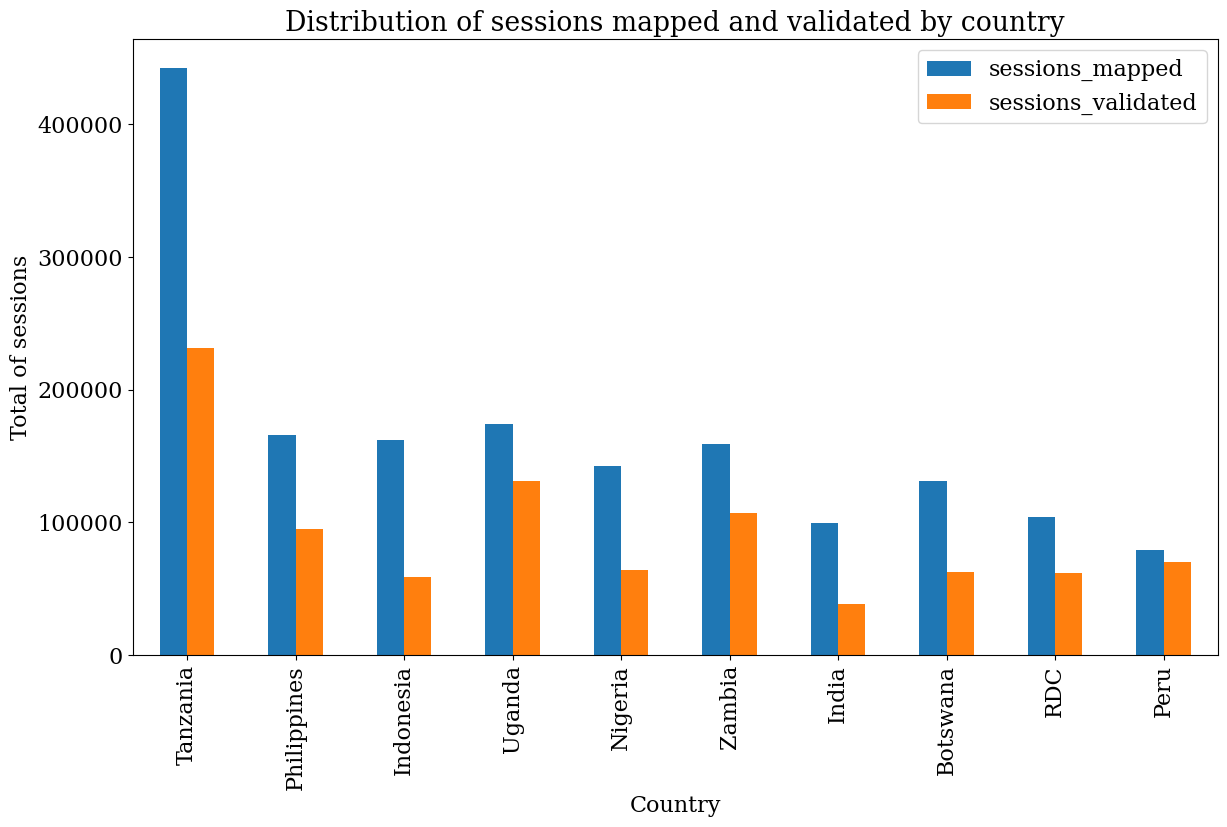

In [110]:
activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = "Country").sum().sort_values(by = "sessions",ascending=False).iloc[:10,:]\
    [['sessions_mapped', 'sessions_validated']].plot(kind="bar")

plt.title("Distribution of sessions mapped and validated by country")
plt.ylabel("Total of sessions")
plt.show()

The location affect the validated sessions ratio as above plot show that according to some countries most of the sessions mapped are validated than others. Then the conversion rate variate accross location.

/tmp/ipykernel_3523/2814944162.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = "Country").sum().sort_values(by = "sessions",ascending=False).iloc[:10,:]\
/tmp/ipykernel_3523/2814944162.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = "Country").sum().sort_values(by = "sessions",ascending=False).iloc[:10,:]\


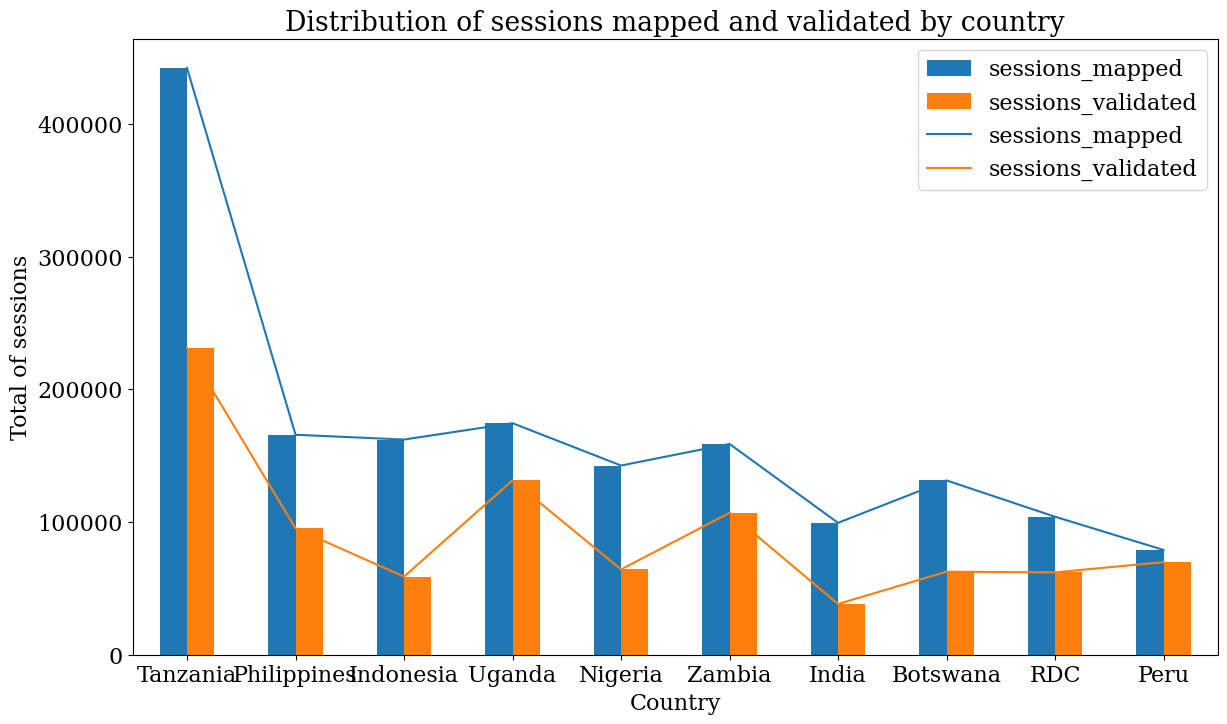

In [111]:
ax = activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = "Country").sum().sort_values(by = "sessions",ascending=False).iloc[:10,:]\
    [['sessions_mapped', 'sessions_validated']].plot(kind="bar")
    
activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = "Country").sum().sort_values(by = "sessions",ascending=False).iloc[:10,:]\
    [['sessions_mapped', 'sessions_validated']].plot(ax = ax)

plt.title("Distribution of sessions mapped and validated by country")
plt.ylabel("Total of sessions")
plt.show()

/tmp/ipykernel_3523/891069379.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = 'organisation').sum().reset_index()


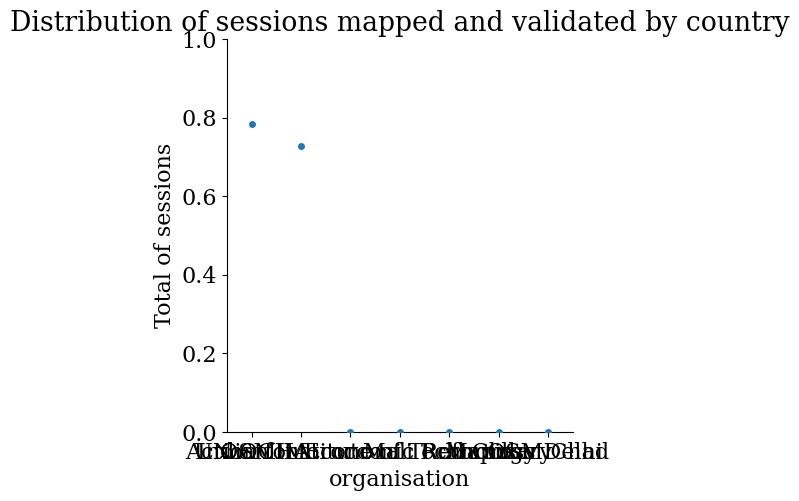

In [112]:
a = activity_by_month.replace("Democratic Republic of the Congo","RDC").groupby(by = 'organisation').sum().reset_index()

a["Ratio validated_by_mapped"] = 100*a["sessions_validated"]/a['sessions_mapped']

a = a[a["Ratio validated_by_mapped"]<=1]

a = a.sort_values(by = "Ratio validated_by_mapped",ascending=False).iloc[:10,:]\
    [['organisation',"Ratio validated_by_mapped"]]

g = sns.catplot(data=a, x= 'organisation', y="Ratio validated_by_mapped")
g.ax.set_ylim(0,1)
plt.title("Distribution of sessions mapped and validated by country")
plt.ylabel("Total of sessions")
plt.show()

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

/tmp/ipykernel_3523/4020151007.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .replace("Open Mapping Hub Asia-Pacific", "OMH Asia-Pacific").groupby(by = 'organisation').sum()


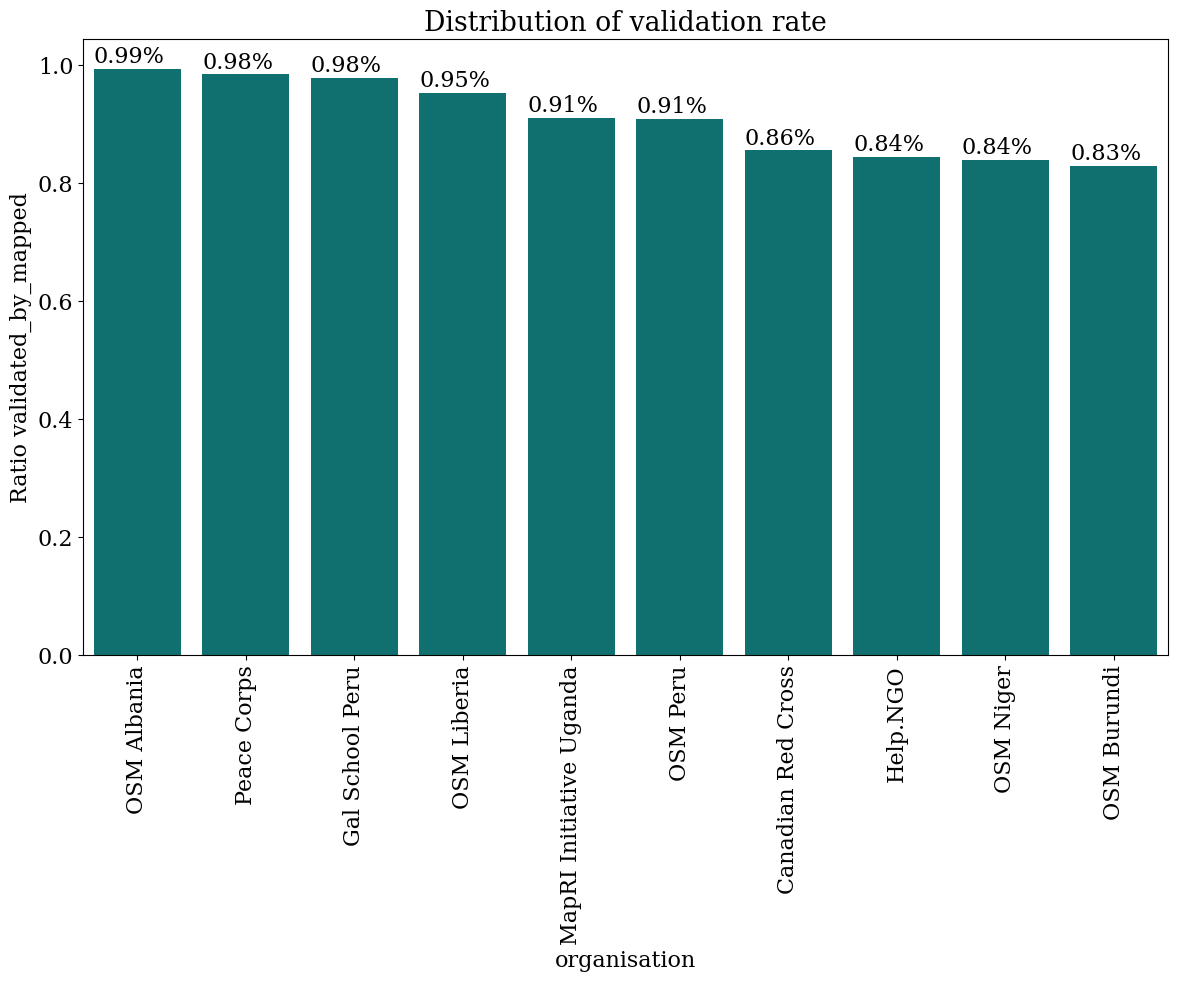

In [113]:
a = activity_by_month.replace("Democratic Republic of the Congo","RDC")\
    .replace("Open Mapping Hub Asia-Pacific", "OMH Asia-Pacific").groupby(by = 'organisation').sum()

a["Ratio validated_by_mapped"] = a["sessions_validated"]/a['sessions_mapped']

a = a[a["Ratio validated_by_mapped"]<=1]

a = a.sort_values(by = "Ratio validated_by_mapped",ascending=False).iloc[:10,:]\
    [["Ratio validated_by_mapped"]]

g = sns.barplot(
    data=a, x=a.index, y="Ratio validated_by_mapped", color= "teal")
plt.title("Distribution of validation rate")
plt.xticks(rotation=90)

#plt.show()

for p in g.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()+0.01
    g.text(txt_x,txt_y,txt)

/tmp/ipykernel_3523/3793378033.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .replace("Open Mapping Hub Asia-Pacific", "OMH Asia-Pacific").groupby(by = 'organisation').sum()


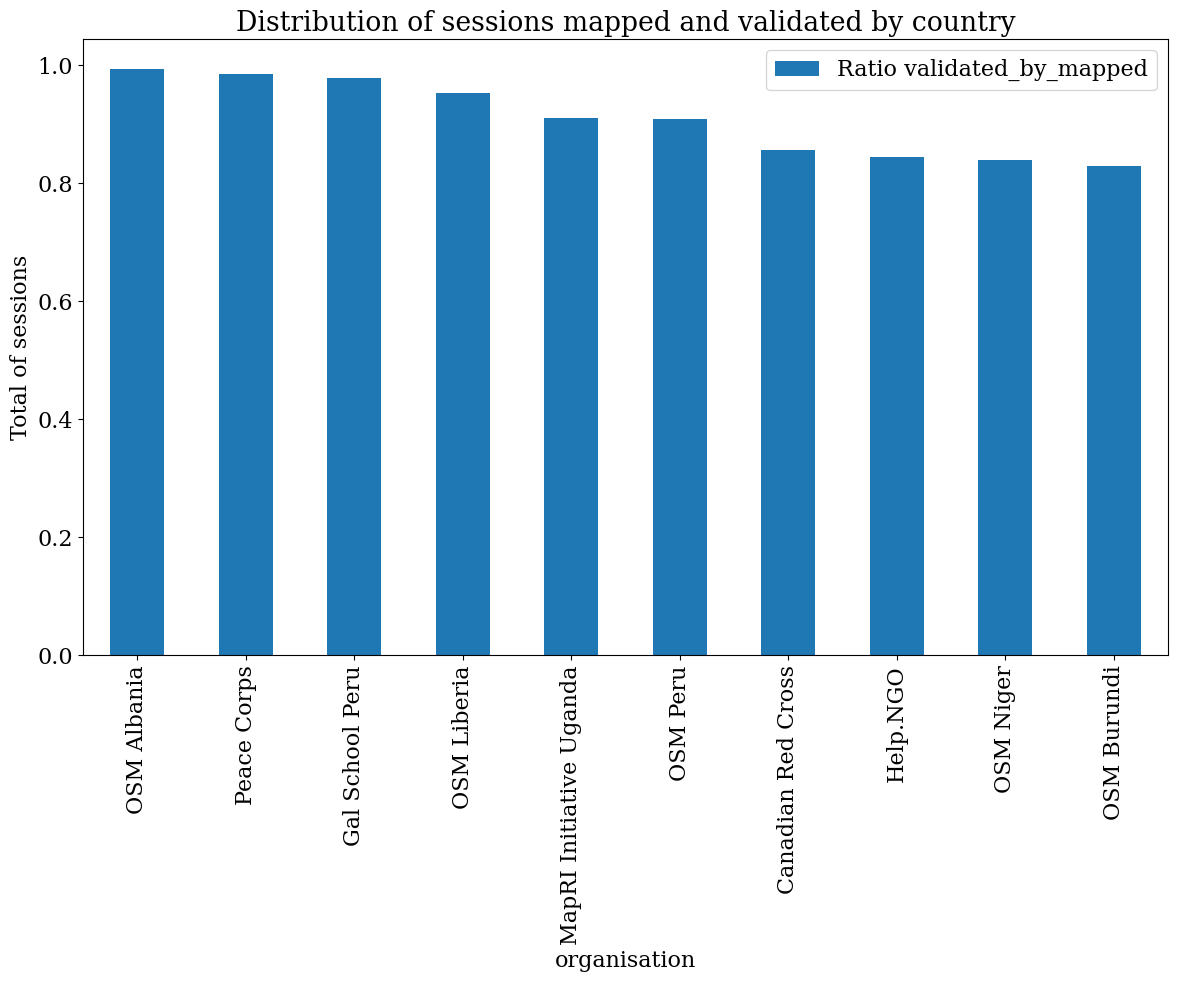

In [114]:
a = activity_by_month.replace("Democratic Republic of the Congo","RDC")\
    .replace("Open Mapping Hub Asia-Pacific", "OMH Asia-Pacific").groupby(by = 'organisation').sum()

a["Ratio validated_by_mapped"] = a["sessions_validated"]/a['sessions_mapped']

a = a[a["Ratio validated_by_mapped"]<=1]

a.sort_values(by = "Ratio validated_by_mapped",ascending=False).iloc[:10,:]\
    [["Ratio validated_by_mapped"]].plot(kind="bar")

plt.title("Distribution of sessions mapped and validated by country")
plt.ylabel("Total of sessions")
plt.show()

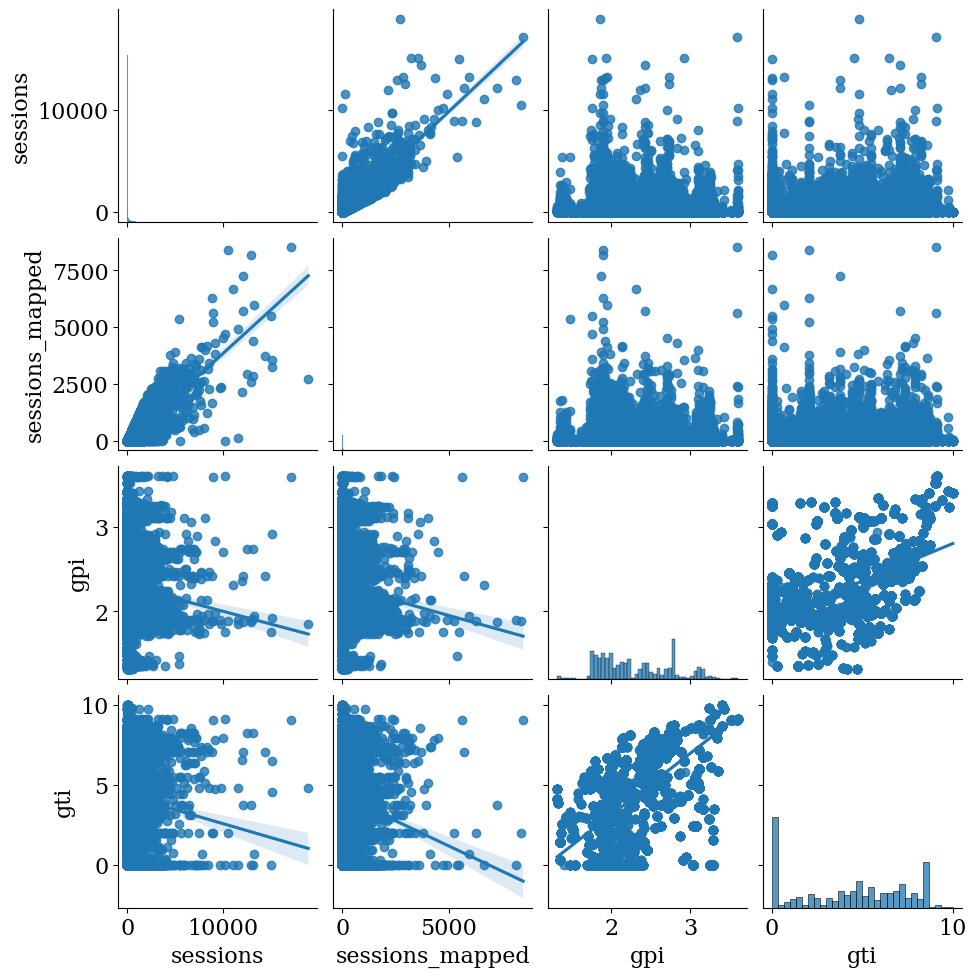

In [115]:
sns.pairplot(activity_by_month[['sessions','sessions_mapped', 'gpi', 'gti']], kind = "reg")
plt.show()

## Data transformation

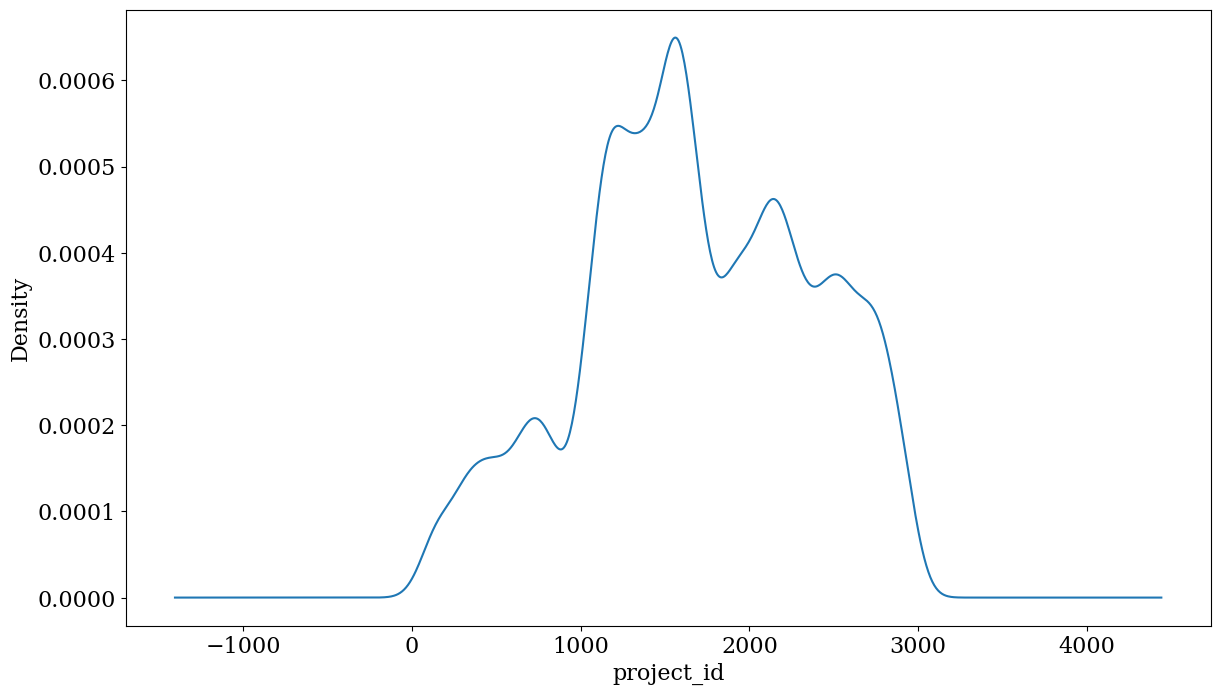

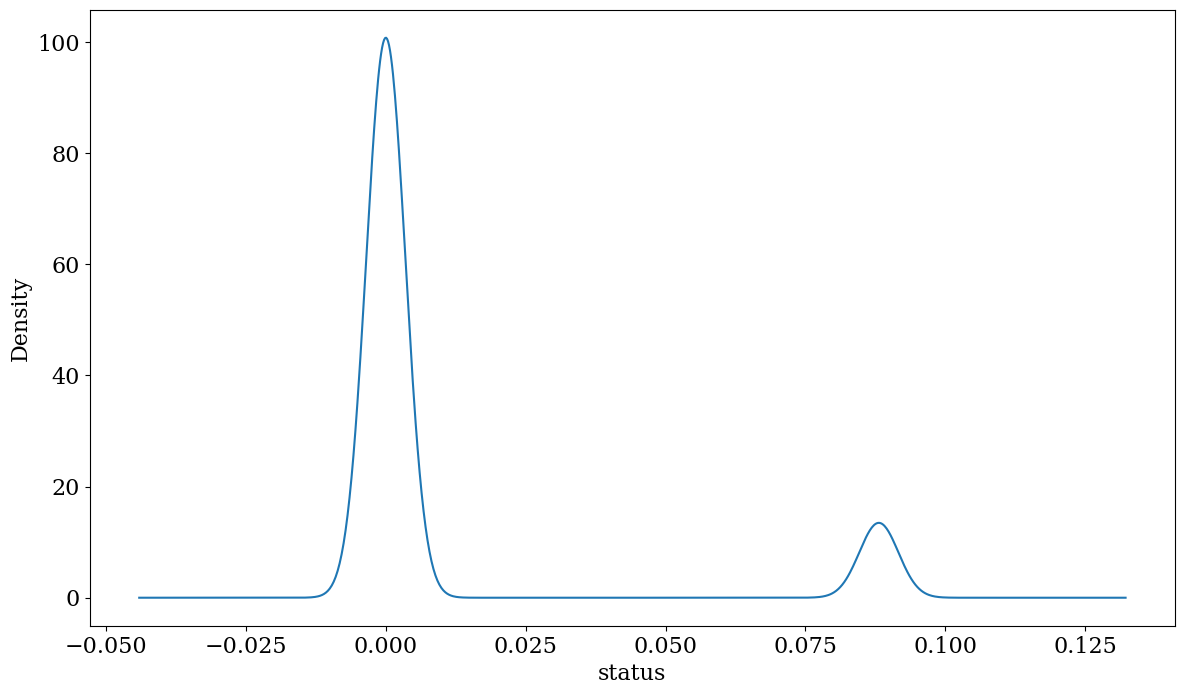

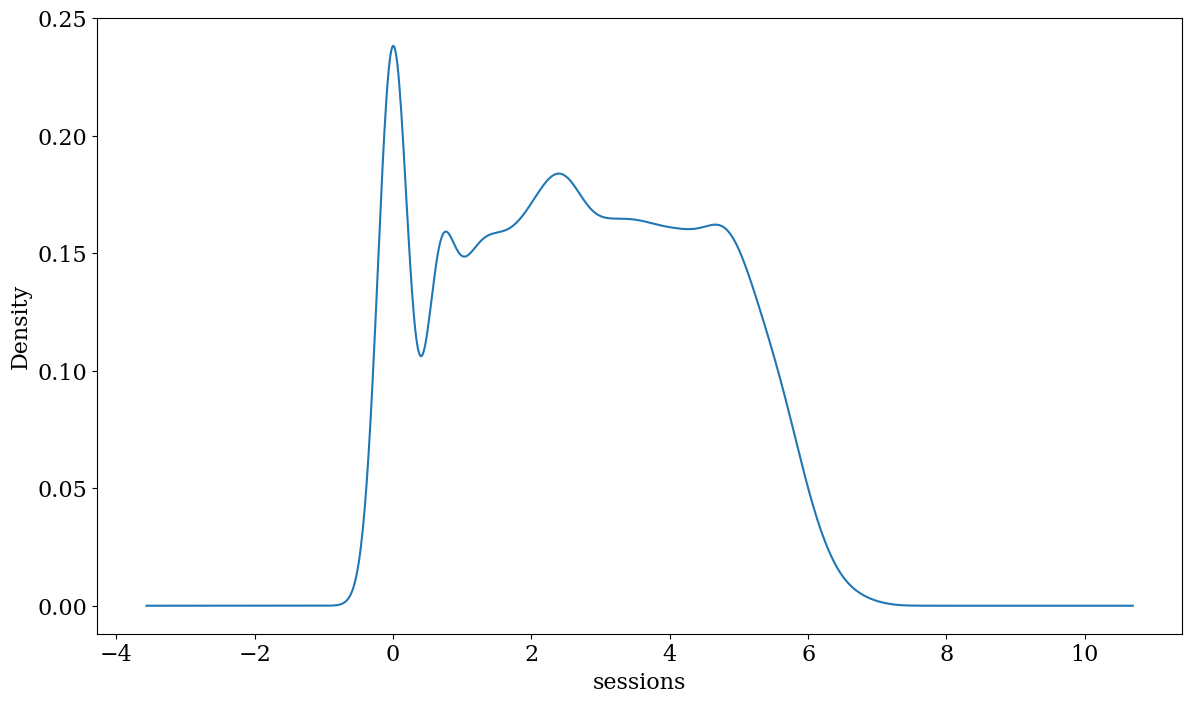

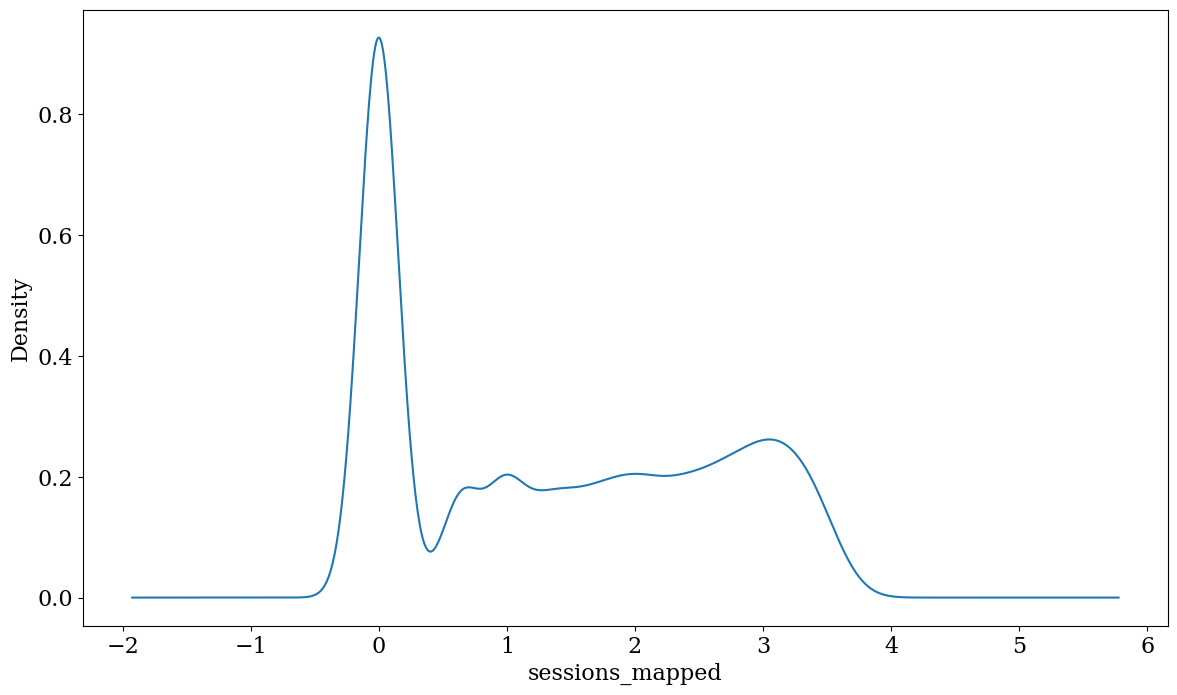

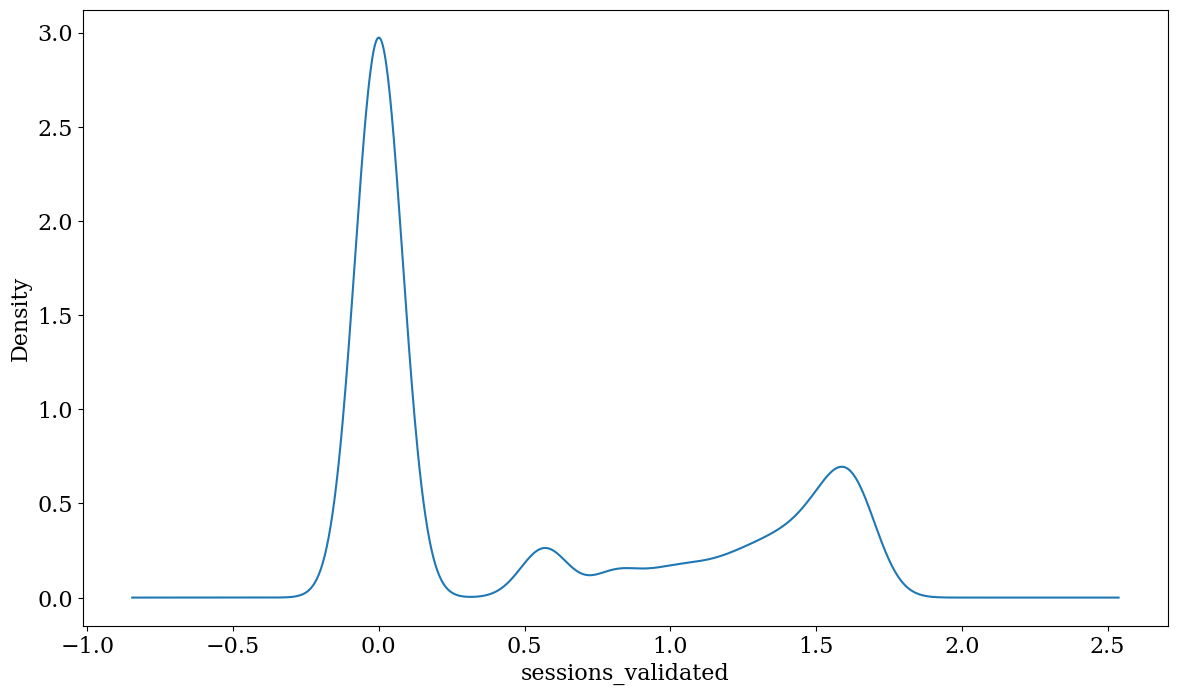

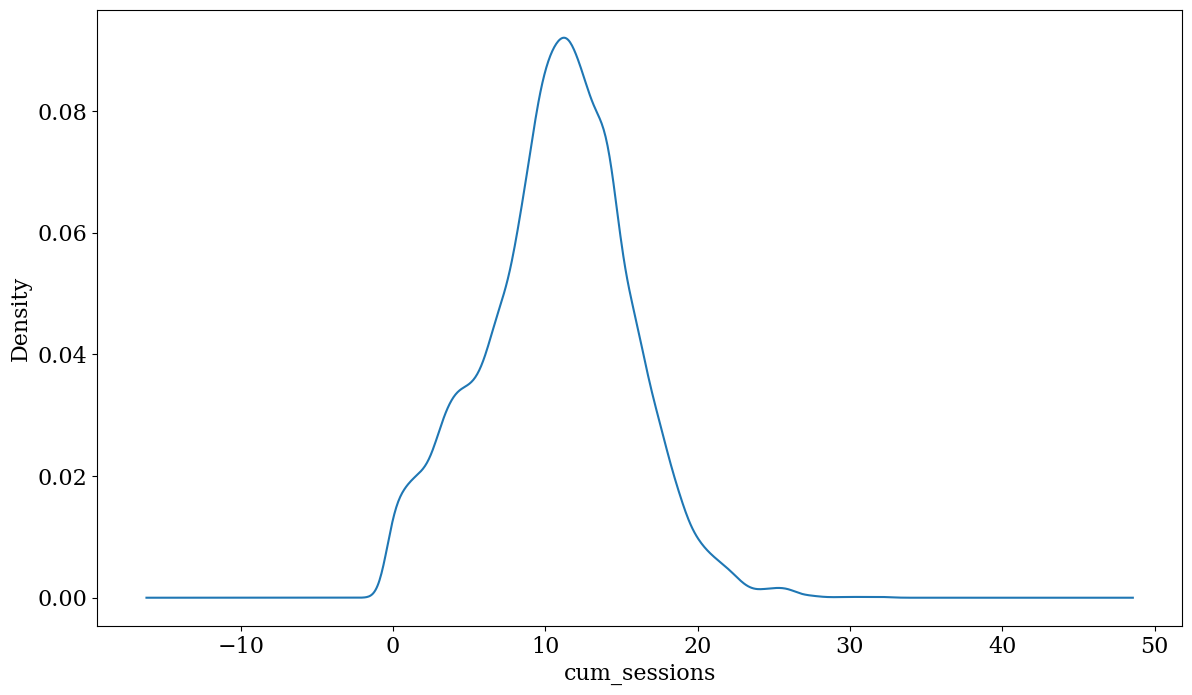

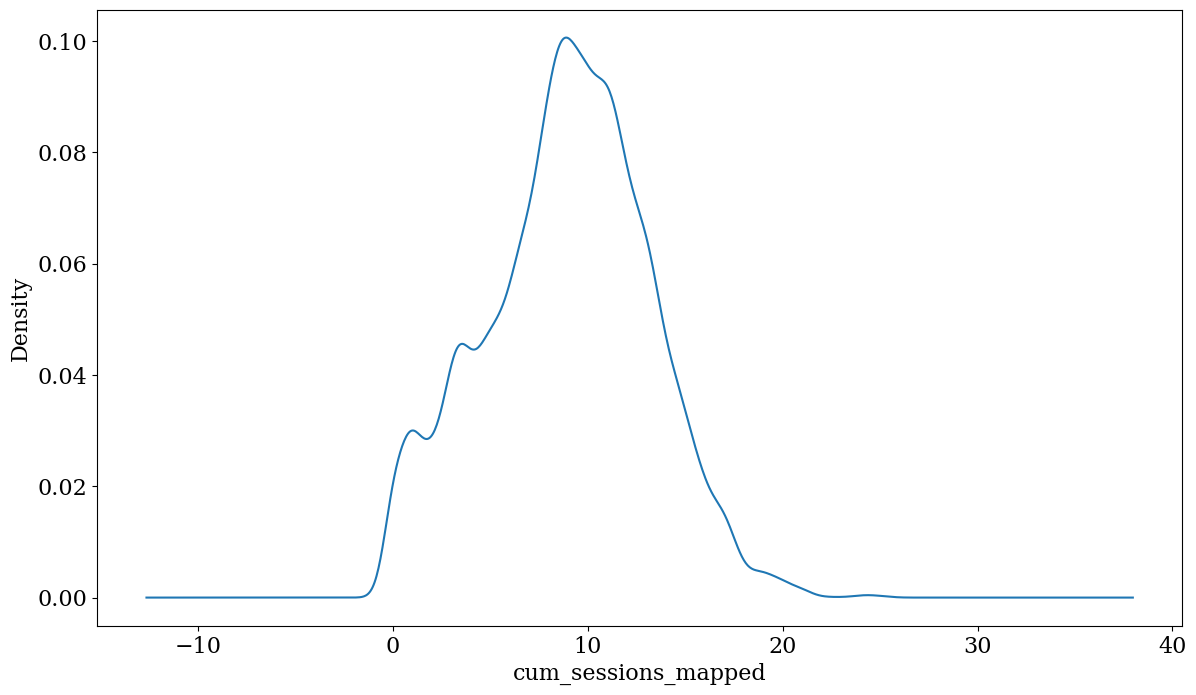

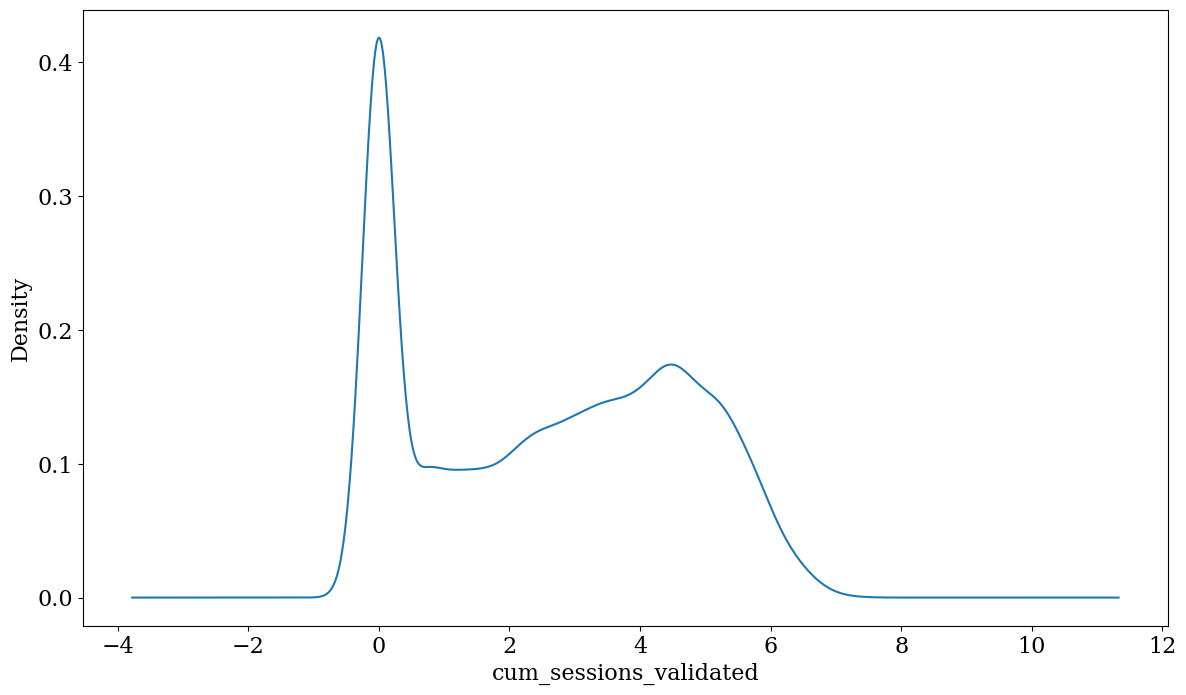

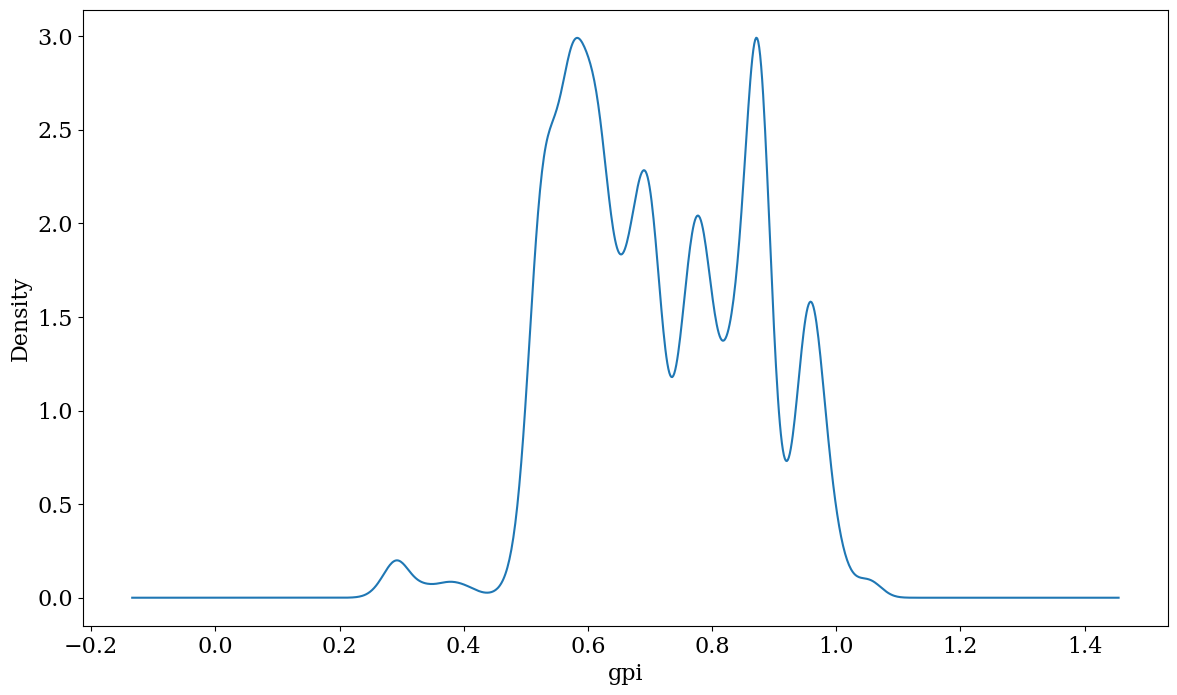

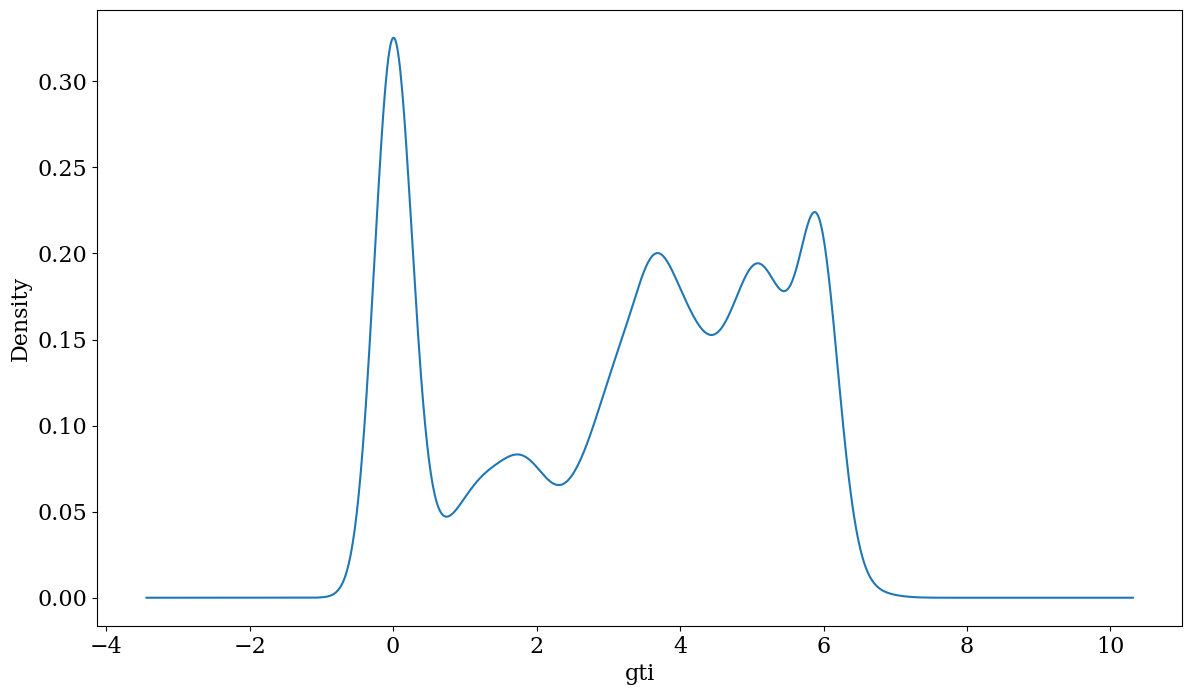

In [116]:
for col in activity_by_month.select_dtypes(include="number").columns:
    
    try:
        
        activity_by_month[col] = boxcox(activity_by_month[col])[0]
    
    except:
        
        activity_by_month[col] = boxcox(activity_by_month[col]+1)[0]
    
    activity_by_month[col].plot(kind = "density")
    plt.xlabel(col)
    #plt.xlim([-0.001,0.001])
    plt.show()

In [117]:
# Do why causality test

In [118]:
import dowhy
from dowhy import CausalModel

In [119]:
independent_cols = ['status', 'sessions','sessions_mapped', 'cum_sessions','cum_sessions_mapped', 'gpi', 'gti']

dependant_col = 'sessions_validated'

In [120]:
model = dowhy.CausalModel(
                          data=activity_by_month,
                          #graph=dot.source.replace("\t", ' ').replace("\n", ' '),
                          treatment=independent_cols,
                           
                           outcome = dependant_col,
                           #graph=data["gml_graph"]
                           
                           )

In [121]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Estimate Causal Effect with propensity score stratifications
estimate = model.estimate_effect(identified_estimand, 
                                
                                 method_name="backdoor.linear_regression",
                                
                                 target_units="att")

print(f"Estimated average treatment effect on the treated {estimate.value:.3}")

Estimated average treatment effect on the treated -1.77


In [122]:
#model.view_model()

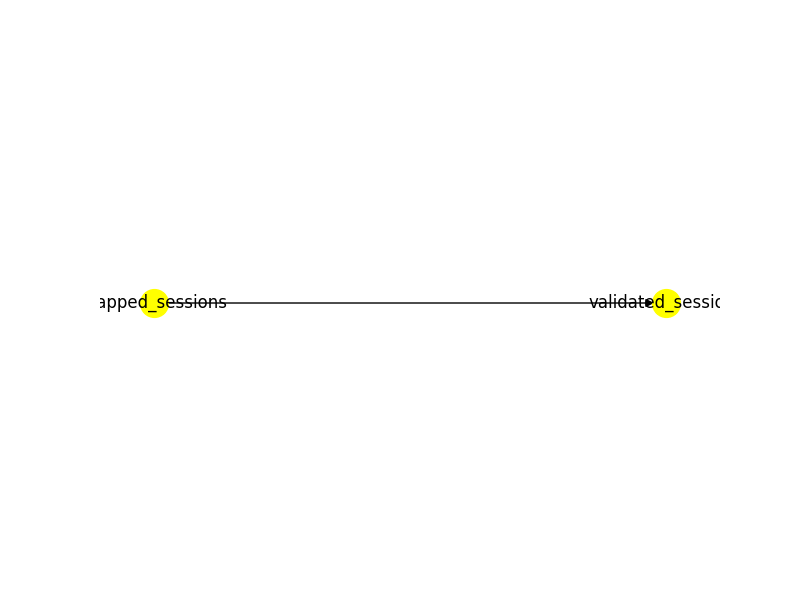

In [123]:
from IPython.display import Image, display

display(Image(filename="causal_model.png"))

In [124]:
independent_cols = ['status', 'sessions','sessions_mapped', 'cum_sessions','cum_sessions_mapped', 'gpi', 'gti']

dependant_col = 'sessions_validated'

In [125]:
independent_cols = ['status', 'sessions','sessions_mapped', 'cum_sessions','cum_sessions_mapped', 'gpi', 'gti']

dependant_col = 'sessions_validated'

X = sm.add_constant(activity_by_month[independent_cols])
y = activity_by_month[dependant_col]

model = sm.OLS(y,X)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     sessions_validated   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     3471.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:22:02   Log-Likelihood:                -26632.
No. Observations:               35619   AIC:                         5.328e+04
Df Residuals:                   35611   BIC:                         5.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1280    

In [126]:
independent_cols = ['status', 'sessions','sessions_mapped', 'cum_sessions','cum_sessions_mapped', 'gpi'e]

dependant_col = 'sessions_validated'

X = sm.add_constant(activity_by_month[independent_cols])
y = activity_by_month[dependant_col]

model = sm.OLS(y,X)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     sessions_validated   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     4049.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:22:02   Log-Likelihood:                -26634.
No. Observations:               35619   AIC:                         5.328e+04
Df Residuals:                   35612   BIC:                         5.334e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1344    